The Efficient Market Hypothesis (EMH) states that the market price reflect all the available information. This implies that past performance of the market does not hold any clue as to what the future perfomance of the market will be. As a result, the market move randomly and there is no way to forecast its future performance.

This article aim to explore the efficiency of US stock market. The S&P 500 monthly data from year 1871 to 2018 is used. The source of the data is from Robert Shiller and retrieved from <a href="https://datahub.io/core/s-and-p-500">here</a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
sp500 = pd.read_csv("dataset/sp500.csv", index_col='Date', parse_dates=True)
print(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768 entries, 1871-01-01 to 2018-04-01
Data columns (total 9 columns):
SP500                   1768 non-null float64
Dividend                1767 non-null float64
Earnings                1764 non-null float64
Consumer Price Index    1768 non-null float64
Long Interest Rate      1768 non-null float64
Real Price              1768 non-null float64
Real Dividend           1767 non-null float64
Real Earnings           1764 non-null float64
PE10                    1648 non-null float64
dtypes: float64(9)
memory usage: 138.1 KB
None


To measure the market efficiency, the 60 months (5 years) autocorrelation for current month return and previous month return were calculated. The interpretations of the autocorrelation are as follow:

1. <b>Zero correlation</b> means future returns have <u>no relationship</u> with past returns. Thus, Market is efficient.
2. <b>Positive correlation</b> means future returns tend to move in the <u>same direction</u> as past returns. If the stock market increase in the previous month, then the stock market will more likely to rise in the next month as well and vice versa.
3. <b>Negative correlation</b> means futures returns tend to move in the <u>opposite direction</u> as past returns. If the stock market increase in the previous month, then the stock market will more likely to fall in the next month and vice versa.  

In [6]:
# monthly return
sp500['return'] = sp500['SP500'].pct_change()
# previous month return
sp500['return lag'] = sp500['return'].shift()
# 60 months correlation
sp500['rolling corr'] = sp500['return'].rolling(60).corr(sp500['return lag'])

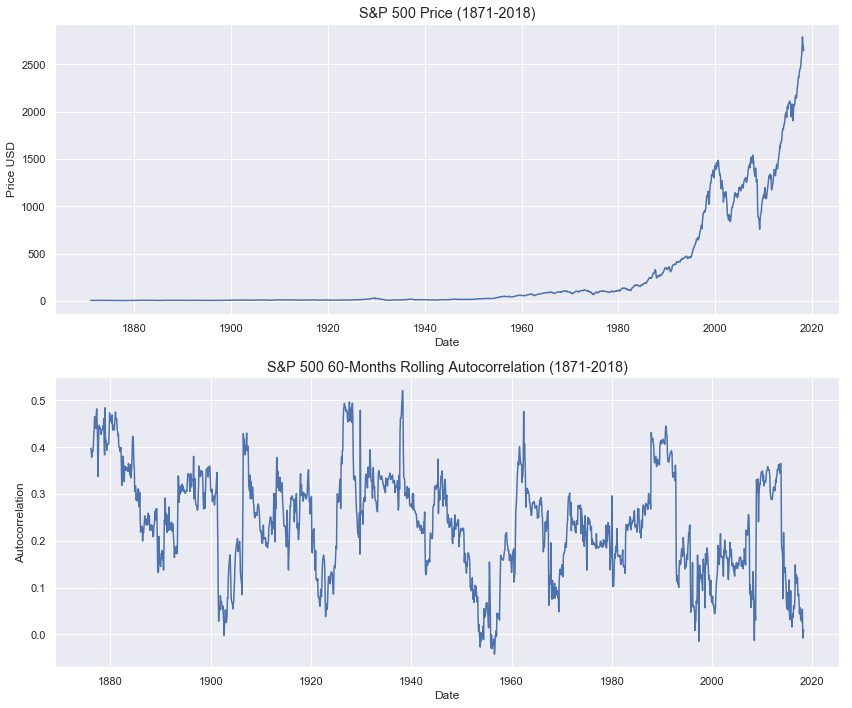

In [7]:
# plot graphs
fig, ax = plt.subplots(nrows=2,figsize=(12,10))

ax[0].plot(sp500['SP500'])
ax[0].set_title("S&P 500 Price (1871-2018)",size='large')
ax[0].set_ylabel('Price USD')
ax[0].set_xlabel('Date')

ax[1].plot(sp500['rolling corr'])
ax[1].set_title("S&P 500 60-Months Rolling Autocorrelation (1871-2018)", size='large')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_xlabel('Date')

fig.tight_layout()

Looking at the autocorrelation plot, several observations can be made:
1. There is a negative drift to the autocorrelation (downward trend).
2. Market efficiency goes up and down. There are periods when the market is more efficient and there are periods when the market is less efficient.
3. It is more common to see positive and low autocorrelation than negative autocorrelation.

Point 1 suggest that over time market is becoming more efficient. This could could be due to increasing availability of information to the masses and increasing number of sophisticate players in the market.

Point 2 suggest that market environment is dynamic and always changing. The market goes from one state to another in cyclic motion. Deterministic to stochastic, trending to sideway, efficient to inefficient.

Point 3 suggest that market have momentum which support the old adage "follow the trend". However, this effect is more apparent in the past and the momentum effect is weaker in the present. The weakening effect of momentum could be due to reasons from point 1 and because momentum strategies are easier to employ and there are plenty of resources on it which allow many people to incorporate the strategy and as a result, erode the performance of the strategy. 

In conclusion, due to the complexity of financial market one can only guess the reason for such market behaviour. However, the explanation using the Adaptive Market Hypothesis (AMH) by Andrew Loh seems to be the most convincing to me. The market is a function of the aggregate quality of its participants. Larger number of sophisticated participants cause the market to be more efficient. The mature population with more experienced and knowledgable will be replaced with younger population which is less experienced and less knowledgable which cause the market to be less efficient. The younger population will then learn and become more experienced and knowledgable which cause the market to be more efficient again. The shift of population composition cause the cyclic motion of market efficiency. Moreover, with new generation becoming better than the previous (I'm an optimist), this generate a downward drift to the autocorrelation and as a result, the market is becoming more efficient over time.